In [2]:
# importar base de dados
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
tabela_vendas = pd.read_excel("/content/drive/MyDrive/Portifolio - Data Analytics /Cursos/Minicursopython =#treinamentos/Vendas.xlsx")
display(tabela_vendas)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71
...,...,...,...,...,...,...,...
100994,69996,2019-12-26,Center Shopping Uberlândia,Short Listrado,2,102,204
100995,69996,2019-12-26,Center Shopping Uberlândia,Mochila,4,270,1080
100996,69996,2019-12-26,Center Shopping Uberlândia,Pulseira Estampa,1,87,87
100997,69997,2019-12-26,Ribeirão Shopping,Camisa Listrado,1,108,108


In [3]:
# Visualizar a base de dados
list(tabela_vendas.columns)

['Código Venda',
 'Data',
 'ID Loja',
 'Produto',
 'Quantidade',
 'Valor Unitário',
 'Valor Final']

In [4]:
# Faturamento por loja
tabela_vendas[["ID Loja", "Valor Final"]]

,ID Loja,Valor Final
0,Iguatemi Esplanada,358
1,Iguatemi Esplanada,360
2,Iguatemi Esplanada,368
3,Norte Shopping,600
4,Norte Shopping,71
...,...,...
100994,Center Shopping Uberlândia,204
100995,Center Shopping Uberlândia,1080
100996,Center Shopping Uberlândia,87
100997,Ribeirão Shopping,108


In [6]:
Faturamento = tabela_vendas[['ID Loja', 'Valor Final']].groupby('ID Loja').sum()
display(Faturamento)

,Valor Final
ID Loja,
Bourbon Shopping SP,1726110
Center Shopping Uberlândia,1668921
Iguatemi Campinas,1762419
Iguatemi Esplanada,1699681
Norte Shopping,1711968
Novo Shopping Ribeirão Preto,1678225
Palladium Shopping Curitiba,1721120
Parque Dom Pedro Shopping,1631630
Passei das Águas Shopping,1649014


from matplotlib import pyplot as plt
Faturamento['Valor Final'].plot(kind='hist', bins=20, title='Valor Final')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Faturamento['Valor Final'].plot(kind='line', figsize=(8, 4), title='Valor Final')
plt.gca().spines[['top', 'right']].set_visible(False)

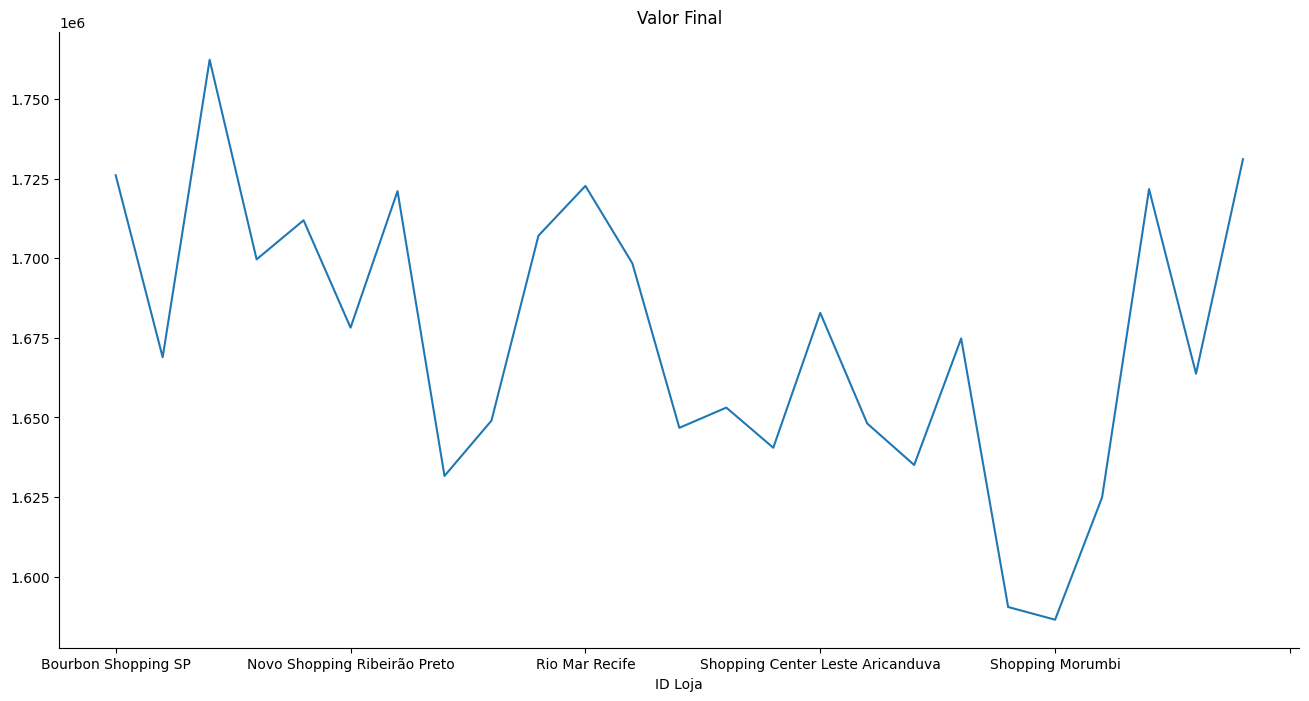

In [12]:
from matplotlib import pyplot as plt
Faturamento['Valor Final'].plot(kind='line', figsize=(16, 8), title='Valor Final')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
# Quantidade de produtos vendidos por loja
Quantidade_produtos = tabela_vendas[['ID Loja', 'Quantidade']].groupby('ID Loja').sum()
display(Quantidade_produtos)

,Quantidade
ID Loja,
Bourbon Shopping SP,8863
Center Shopping Uberlândia,8627
Iguatemi Campinas,8935
Iguatemi Esplanada,8580
Norte Shopping,9014
Novo Shopping Ribeirão Preto,8751
Palladium Shopping Curitiba,9091
Parque Dom Pedro Shopping,8388
Passei das Águas Shopping,8618


from matplotlib import pyplot as plt
Quantidade_produtos['Quantidade'].plot(kind='hist', bins=20, title='Quantidade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
Quantidade_produtos['Quantidade'].plot(kind='line', figsize=(8, 4), title='Quantidade')
plt.gca().spines[['top', 'right']].set_visible(False)

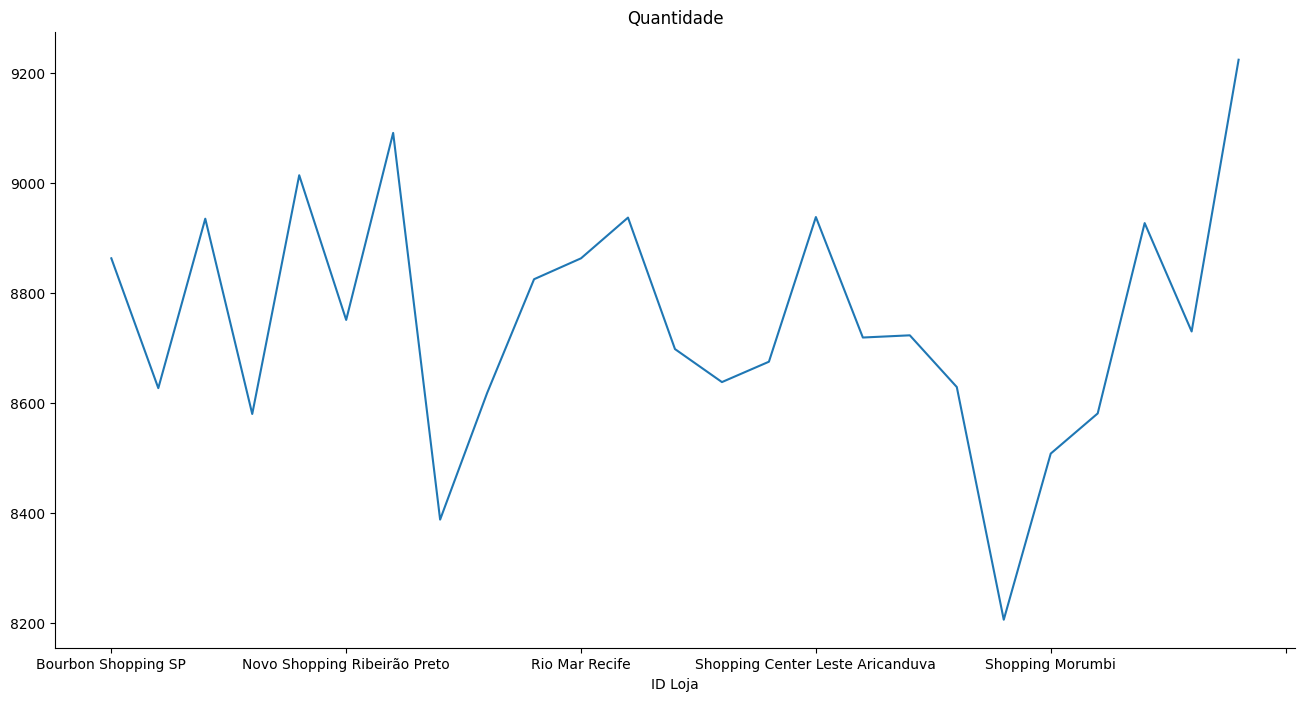

In [13]:
from matplotlib import pyplot as plt
Quantidade_produtos['Quantidade'].plot(kind='line', figsize=(16, 8), title='Quantidade')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
# Ticket médio por produto em cada loja
ticket_medio = (Faturamento['Valor Final'] / Quantidade_produtos['Quantidade']).to_frame()
ticket_medio = ticket_medio.rename(columns={0: 'Ticket Médio'})
display(ticket_medio)

,Ticket Médio
ID Loja,
Bourbon Shopping SP,194.754598
Center Shopping Uberlândia,193.453228
Iguatemi Campinas,197.248909
Iguatemi Esplanada,198.098019
Norte Shopping,189.923231
Novo Shopping Ribeirão Preto,191.775226
Palladium Shopping Curitiba,189.321307
Parque Dom Pedro Shopping,194.519552
Passei das Águas Shopping,191.345324


from matplotlib import pyplot as plt
ticket_medio['Ticket Médio'].plot(kind='hist', bins=20, title='Ticket Médio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ticket_medio['Ticket Médio'].plot(kind='line', figsize=(8, 4), title='Ticket Médio')
plt.gca().spines[['top', 'right']].set_visible(False)

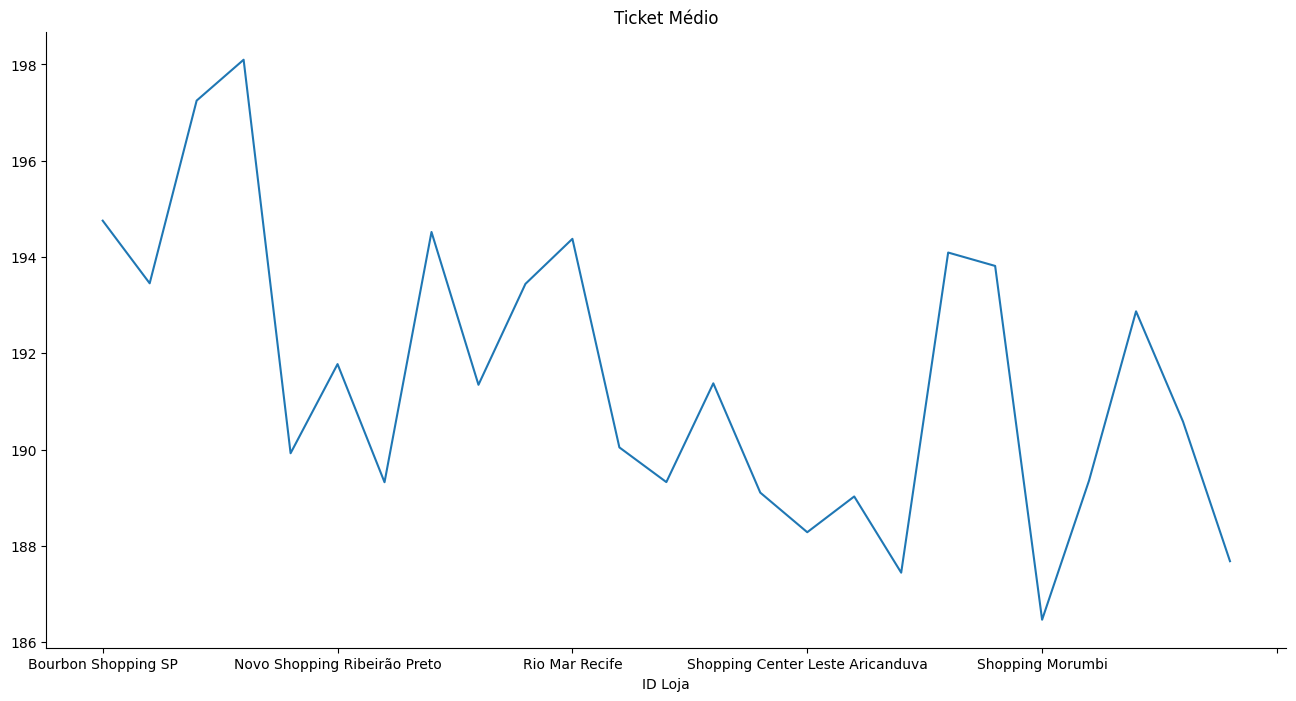

In [15]:
from matplotlib import pyplot as plt
ticket_medio['Ticket Médio'].plot(kind='line', figsize=(16, ), title='Ticket Médio')
plt.gca().spines[['top', 'right']].set_visible(False)

In [34]:
# enviar email com relatório
import smtplib
import email.message

def enviar_email():
  corpo_email = f'''
  <p>Prezados,</p>
  <p>Segue o relatório de vendas por cada loja.</p>

  <p>Faturamento</p>
  {Faturamento.to_html(formatters={'Valor Final': 'R${:,.2f}'.format})}

  <p>Quantidade de produtos vendidos</p>
  {Quantidade_produtos.to_html()}

  <p>Ticket médio dos produtos em cada loja</p>
  {ticket_medio.to_html(formatters={'Ticket Médio': 'R${:,.2f}'.format})}

  <p>Qualquer dúvida estou à disposição</p>

  <p>Att,</p>

  <p> Luciana Batistà</p>


  '''

  msg = email.message.Message()
  msg['Subject'] = "Relatório de Vendas"
  msg['From'] = 'lu.assis.la@gmail.com'
  msg['To'] = 'lu.assis.la@gmail.com'
  password = 'khfhppubefddiskg'
  msg.add_header('Content-Type', 'text/html')
  msg.set_payload(corpo_email)

  envia = smtplib.SMTP('smtp.gmail.com: 587')
  envia.starttls()
  envia.login(msg['From'], password)
  envia.sendmail(msg['From'], [msg['To']], msg.as_string().encode('utf-8'))
  print('Email enviado')

In [35]:
enviar_email()

Email enviado
